Resources/Bibliograpy:

- [Fourier Decomposition Analysis for non-linear & non-stationary data]()
- [Empirical Mode Decomposition (EMD)](https://srcole.github.io/2016/01/18/emd/)
- [Ensemble Empirical Mode Decomposition (EEMD)](https://www.worldscientific.com/doi/abs/10.1142/S1793536909000047)
- [EEMD + LSTM](https://link.springer.com/article/10.1007/s11269-019-02345-1)

In [2]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Replace sample_func_dir by the name of directory in src/ and replace sample_func_file the
# file name in src/sample_func_dir

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import *
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline
from PyEMD import EEMD

In [3]:
# Load data 
csv_index   = 2
synth_name  = "basic"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"
df_basic    = import_df_from_zip_pkl(path_to_zip, index=csv_index, verbose=True)

time for importing dataframe: 0.66 seconds


In [4]:
# Preprocess data
df_basic = downsample_dataframe(df_basic, night_method='basic', clip_method='flexible')

In [5]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00-05:00 to 2019-12-31 00:00:00-05:00
Freq: D
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Power          1826 non-null   float64
 1   POA            1826 non-null   float64
 2   Tamb           1826 non-null   float64
 3   Wind           1826 non-null   float64
 4   Degradation    1826 non-null   float64
 5   Soiling        1826 non-null   float64
 6   Faults         1826 non-null   float64
 7   minute_of_day  1826 non-null   float64
dtypes: float64(8)
memory usage: 128.4 KB


In [7]:
df_basic.head()

,Power,POA,Tamb,Wind,Degradation,Soiling,Faults,minute_of_day
datetime,,,,,,,,
2015-01-01 00:00:00-05:00,807.936131,322.678832,7.499453,0.0,0.999986,1.0,1.0,746.5
2015-01-02 00:00:00-05:00,813.564899,324.760512,7.459781,0.0,0.999959,1.0,1.0,747.0
2015-01-03 00:00:00-05:00,816.494526,325.802920,7.417883,0.0,0.999932,1.0,1.0,747.5
2015-01-04 00:00:00-05:00,819.794171,326.939891,7.375228,0.0,0.999905,1.0,1.0,748.0
2015-01-05 00:00:00-05:00,823.370909,328.225455,7.334909,0.0,0.999878,1.0,1.0,748.5


In [8]:
eemd = EEMD()

In [9]:
days  = np.arange(1, 1827, 1)
eIMFs = eemd.eemd(df_basic.Power.to_numpy(), days)
nIMFs = eIMFs.shape[0]

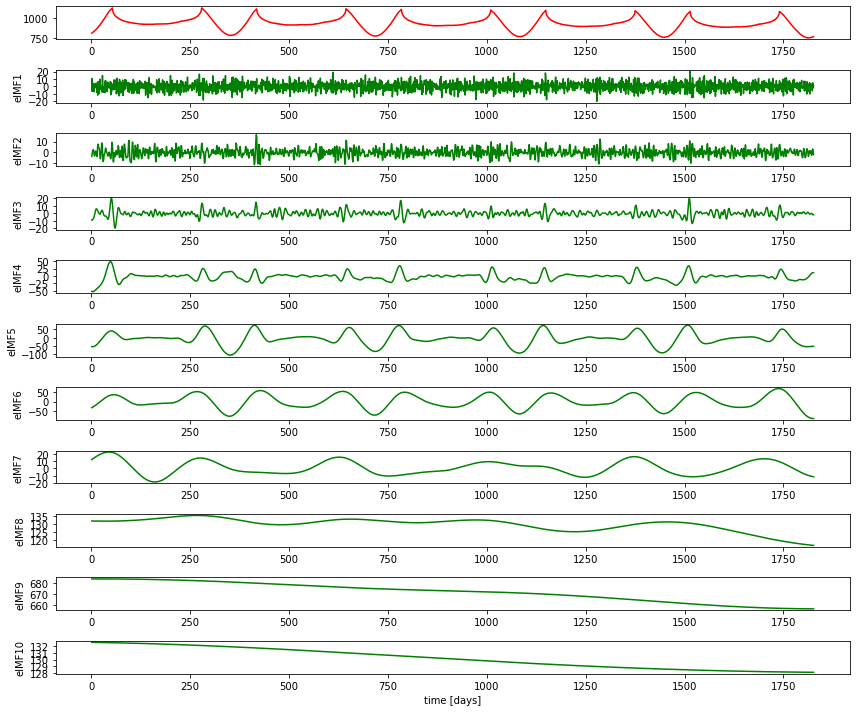

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(days, df_basic.Power.to_numpy(), "red")

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(days, eIMFs[n], 'g')
    plt.ylabel("eIMF%i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.xlabel("time [days]")
plt.tight_layout()

In [11]:
eemd = EEMD()
emd  = eemd.EMD
emd.extrema_detection="parabol"
days  = np.arange(1, 1827, 1)
eIMFs = eemd.eemd(df_basic.Power.to_numpy(), days)
nIMFs = eIMFs.shape[0]

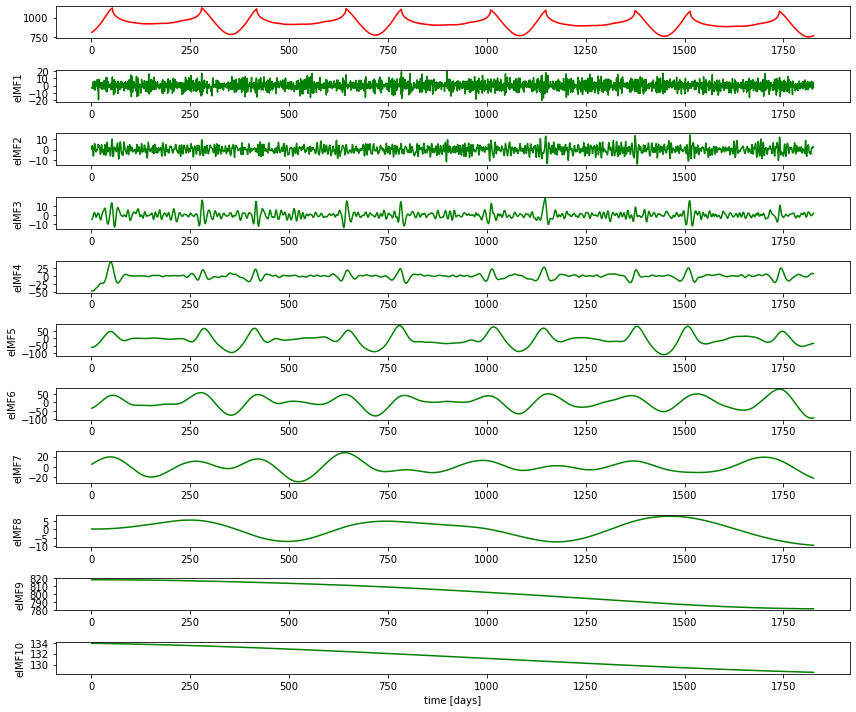

In [12]:
plt.figure(figsize=(12, 10))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(days, df_basic.Power.to_numpy(), "red")

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(days, eIMFs[n], 'g')
    plt.ylabel("eIMF%i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.xlabel("time [days]")
plt.tight_layout()

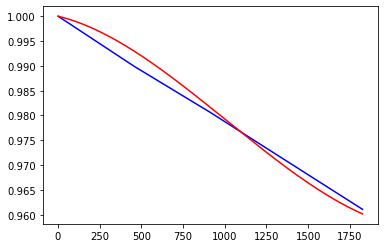

In [13]:
fig, ax = plt.subplots()
df_years = df_basic.resample("y").mean()
years    = [1., days[-1]/4, days[-1]/4*2, days[-1]/4*3, days[-1]/4*4]
ax.plot(years, df_years.Power.to_numpy()/df_years.Power.to_numpy()[0], color="blue")
ax.plot(days, eIMFs[-1]/eIMFs[-1][0], color="red")